# Class 4: Life history and conservation status
## EEB 125 | 2 February 2022
### Profs. Caroline Parins-Fukuchi, Paul Gries, and Nathan Taback

#### Class 4: Data Wrangling and Exploratory Data Analysis 

## Learning Objectives

By the end of today's class you will be able to:

- select subsets of rows using operators `!=`, `>`, `>=`, `<`, `<=`

- operations on `pandas` `Series` and `DataFrames`.

- join two data frames

- Grouped summaries of data

- Define statistical variables from data using Python.

<!--
- Understand the difference between categorical (nominal and ordered) , and interval variables.

- Create numerical and visual data summaries of categorical variables using Python.

- Understand how to interpret categorical variables and bar charts in context.

- Create numerical and visual data summaries of categorical variables using Python.

- Understand how to compute and interpret frequency and cumulative frequency distributions.

- Understand strategies on managing missing values and the implications on data interpretations.
-->

# Today's data story:
## Are mammals that take longer go grow up at greater risk of extinction?

# How long do individuals take to grow up?

- Different lineages reach maturity at different ages

- **Does this variation contribute to differences in extinction risk?**

![](images/growup.svg)

First, let's review some Booleans.

# More on Selecting Rows/Selecting Subsets/Filtering Rows

- Last week we discussed how to select rows using `&`, `|` by creating Boolean variables that correspond to creating subsets of a data frame (e.g., urban and middle age).

- This week we will review how to select subsets using:
  + `!=` - not equal
  + `>` - greater than
  + `>=` - greater than or equal to
  + `<` - less than
  + `<=` - less than or equal to

In [2]:
import matplotlib as plt
import matplotlib.style
#plt.style.use('dark_background')

In [3]:
# we'll start by reading in and prepping our data

import pandas as pd

pantheria = pd.read_csv('pantheria.txt',sep="\t")
pantheria.head()

,MSW05_Order,MSW05_Family,MSW05_Genus,MSW05_Species,MSW05_Binomial,1-1_ActivityCycle,5-1_AdultBodyMass_g,8-1_AdultForearmLen_mm,13-1_AdultHeadBodyLen_mm,2-1_AgeatEyeOpening_d,...,26-6_GR_MinLong_dd,26-7_GR_MidRangeLong_dd,27-1_HuPopDen_Min_n/km2,27-2_HuPopDen_Mean_n/km2,27-3_HuPopDen_5p_n/km2,27-4_HuPopDen_Change,28-1_Precip_Mean_mm,28-2_Temp_Mean_01degC,30-1_AET_Mean_mm,30-2_PET_Mean_mm
0,Artiodactyla,Camelidae,Camelus,dromedarius,Camelus dromedarius,3.0,492714.47,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Carnivora,Canidae,Canis,adustus,Canis adustus,1.0,10392.49,NaN,745.32,NaN,...,-17.53,13.00,0.0,35.20,1.0,0.14,90.75,236.51,922.90,1534.40
2,Carnivora,Canidae,Canis,aureus,Canis aureus,2.0,9658.70,NaN,827.53,7.50,...,-17.05,45.74,0.0,79.29,0.0,0.10,44.61,217.23,438.02,1358.98
3,Carnivora,Canidae,Canis,latrans,Canis latrans,2.0,11989.10,NaN,872.39,11.94,...,-168.12,-117.60,0.0,27.27,0.0,0.06,53.03,58.18,503.02,728.37
4,Carnivora,Canidae,Canis,lupus,Canis lupus,2.0,31756.51,NaN,1055.00,14.01,...,-171.84,3.90,0.0,37.87,0.0,0.04,34.79,4.82,313.33,561.11


In [4]:
pantheria.columns

Index(['MSW05_Order', 'MSW05_Family', 'MSW05_Genus', 'MSW05_Species',
       'MSW05_Binomial', '1-1_ActivityCycle', '5-1_AdultBodyMass_g',
       '8-1_AdultForearmLen_mm', '13-1_AdultHeadBodyLen_mm',
       '2-1_AgeatEyeOpening_d', '3-1_AgeatFirstBirth_d',
       '18-1_BasalMetRate_mLO2hr', '5-2_BasalMetRateMass_g', '6-1_DietBreadth',
       '7-1_DispersalAge_d', '9-1_GestationLen_d', '12-1_HabitatBreadth',
       '22-1_HomeRange_km2', '22-2_HomeRange_Indiv_km2',
       '14-1_InterbirthInterval_d', '15-1_LitterSize', '16-1_LittersPerYear',
       '17-1_MaxLongevity_m', '5-3_NeonateBodyMass_g',
       '13-2_NeonateHeadBodyLen_mm', '21-1_PopulationDensity_n/km2',
       '10-1_PopulationGrpSize', '23-1_SexualMaturityAge_d',
       '10-2_SocialGrpSize', '24-1_TeatNumber', '12-2_Terrestriality',
       '6-2_TrophicLevel', '25-1_WeaningAge_d', '5-4_WeaningBodyMass_g',
       '13-3_WeaningHeadBodyLen_mm', 'References', '5-5_AdultBodyMass_g_EXT',
       '16-2_LittersPerYear_EXT', '5-6_NeonateB

In [5]:
important_columns = ["MSW05_Order","MSW05_Binomial","5-1_AdultBodyMass_g","23-1_SexualMaturityAge_d","14-1_InterbirthInterval_d",'17-1_MaxLongevity_m',"15-1_LitterSize"]

sub_pantheria = pantheria[important_columns]
sub_pantheria.head()

,MSW05_Order,MSW05_Binomial,5-1_AdultBodyMass_g,23-1_SexualMaturityAge_d,14-1_InterbirthInterval_d,17-1_MaxLongevity_m,15-1_LitterSize
0,Artiodactyla,Camelus dromedarius,492714.47,1947.94,614.41,480.0,0.98
1,Carnivora,Canis adustus,10392.49,249.88,NaN,137.0,4.50
2,Carnivora,Canis aureus,9658.70,371.23,365.00,192.0,3.74
3,Carnivora,Canis latrans,11989.10,372.90,365.00,262.0,5.72
4,Carnivora,Canis lupus,31756.51,679.37,365.00,354.0,4.98


In [6]:
# rename columns so they are more human-friendly

columnnames = {'MSW05_Order': 'order',
               'MSW05_Binomial': 'genus_species',
               '5-1_AdultBodyMass_g': 'body_mass_g',
               '23-1_SexualMaturityAge_d': 'maturity_d',
               '14-1_InterbirthInterval_d': 'interbirth_d',
               '17-1_MaxLongevity_m': 'longevity_m',
               '15-1_LitterSize': 'litter_size_ind'}

rn_pantheria = sub_pantheria.rename(columns=columnnames)

In [7]:
rn_pantheria.head()

,order,genus_species,body_mass_g,maturity_d,interbirth_d,longevity_m,litter_size_ind
0,Artiodactyla,Camelus dromedarius,492714.47,1947.94,614.41,480.0,0.98
1,Carnivora,Canis adustus,10392.49,249.88,NaN,137.0,4.50
2,Carnivora,Canis aureus,9658.70,371.23,365.00,192.0,3.74
3,Carnivora,Canis latrans,11989.10,372.90,365.00,262.0,5.72
4,Carnivora,Canis lupus,31756.51,679.37,365.00,354.0,4.98


## How many days does the average mammal take from birth to be biologically mature?


## Use not-equal to operator `>` 

A Boolean series that is `True` when `maturity_d` is greater than `X` and `False` otherwise.

In [8]:
maturity_series = rn_pantheria['maturity_d']

In [9]:
grow1yr = (maturity_series<(365))
grow1yr.value_counts()

False    4925
True      491
Name: maturity_d, dtype: int64

In [10]:
grow110yr = (maturity_series>=365) & (maturity_series<(365*10))
grow110yr.value_counts()

False    4874
True      542
Name: maturity_d, dtype: int64

In [11]:
grow10yr = (maturity_series>(365*10))
grow10yr.value_counts()

False    5398
True       18
Name: maturity_d, dtype: int64

# Does anyone notice a problem here??

In [12]:
maturity_seriesMIS = maturity_series.isna()
maturity_seriesMIS.value_counts()



True     4365
False    1051
Name: maturity_d, dtype: int64

### uff da!! we've got some missing data

- we can perform calculations with missing values removed using the `dropna()` function in pandas

In [13]:
grow1yr = (maturity_series.dropna()<(365))
grow1yr.value_counts()

False    560
True     491
Name: maturity_d, dtype: int64

In [14]:
grow110yr = (maturity_series.dropna()>=365) & (maturity_series.dropna()<(365*10))
grow110yr.value_counts()

True     542
False    509
Name: maturity_d, dtype: int64

In [15]:
grow10yr = (maturity_series.dropna()>(365*10))
grow10yr.value_counts()

False    1033
True       18
Name: maturity_d, dtype: int64

## little better. but what if we want measurements in years?

In [16]:
maturity_series_yr = maturity_series/365.
maturity_series_yr

0       5.336822
1       0.684603
2       1.017068
3       1.021644
4       1.861288
          ...   
5411    0.424822
5412         NaN
5413         NaN
5414         NaN
5415    0.424822
Name: maturity_d, Length: 5416, dtype: float64

In [17]:
grow1yr = (maturity_series_yr.dropna()<(1))
grow1yr.value_counts()

False    560
True     491
Name: maturity_d, dtype: int64

In [18]:
grow110yr = (maturity_series_yr.dropna()>=1) & (maturity_series_yr.dropna()<(10))
grow110yr.value_counts()

True     542
False    509
Name: maturity_d, dtype: int64

In [19]:
grow10yr = (maturity_series_yr.dropna()>(10))
grow10yr.value_counts()

False    1033
True       18
Name: maturity_d, dtype: int64

# What if we want proportions?

- We can use `.sum()` to calculate the denominator and divide our values by that

In [20]:
counts = grow1yr.value_counts()
prop_short = counts[1]/counts.sum()
prop_short * 100

46.7174119885823

In [21]:
counts = grow110yr.value_counts()
prop_med = counts[1]/counts.sum()
prop_med * 100

51.56993339676499

In [22]:
counts = grow10yr.value_counts()
prop_long = counts[1]/counts.sum()
prop_long * 100

1.7126546146527115

# Data transformations with `pandas` series and DataFrames

- The important thing here is that Series containing numeric variables (floats and ints) can be multiplied, divided, added, subtracted.

# Joining Tables

- What is the relationship between how long it takes for a species to grow up and its risk of going extinct?


In [23]:
pantheria.head()

,MSW05_Order,MSW05_Family,MSW05_Genus,MSW05_Species,MSW05_Binomial,1-1_ActivityCycle,5-1_AdultBodyMass_g,8-1_AdultForearmLen_mm,13-1_AdultHeadBodyLen_mm,2-1_AgeatEyeOpening_d,...,26-6_GR_MinLong_dd,26-7_GR_MidRangeLong_dd,27-1_HuPopDen_Min_n/km2,27-2_HuPopDen_Mean_n/km2,27-3_HuPopDen_5p_n/km2,27-4_HuPopDen_Change,28-1_Precip_Mean_mm,28-2_Temp_Mean_01degC,30-1_AET_Mean_mm,30-2_PET_Mean_mm
0,Artiodactyla,Camelidae,Camelus,dromedarius,Camelus dromedarius,3.0,492714.47,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Carnivora,Canidae,Canis,adustus,Canis adustus,1.0,10392.49,NaN,745.32,NaN,...,-17.53,13.00,0.0,35.20,1.0,0.14,90.75,236.51,922.90,1534.40
2,Carnivora,Canidae,Canis,aureus,Canis aureus,2.0,9658.70,NaN,827.53,7.50,...,-17.05,45.74,0.0,79.29,0.0,0.10,44.61,217.23,438.02,1358.98
3,Carnivora,Canidae,Canis,latrans,Canis latrans,2.0,11989.10,NaN,872.39,11.94,...,-168.12,-117.60,0.0,27.27,0.0,0.06,53.03,58.18,503.02,728.37
4,Carnivora,Canidae,Canis,lupus,Canis lupus,2.0,31756.51,NaN,1055.00,14.01,...,-171.84,3.90,0.0,37.87,0.0,0.04,34.79,4.82,313.33,561.11


In [24]:
phylacine = pd.read_csv("phylacine.csv")
phylacine.head()

,Binomial.1.2,Order.1.2,Family.1.2,Genus.1.2,Species.1.2,Terrestrial,Marine,Freshwater,Aerial,Life.Habit.Method,...,Mass.Comparison,Mass.Comparison.Source,Island.Endemicity,IUCN.Status.1.2,Added.IUCN.Status.1.2,Diet.Plant,Diet.Vertebrate,Diet.Invertebrate,Diet.Method,Diet.Source
0,Abditomys_latidens,Rodentia,Muridae,Abditomys,latidens,1,0,0,0,Reported,...,NaN,NaN,Occurs only on isolated islands,DD,No,100,0,0,Reported 000 Species,"Wilman, H., et al. 2014. EltonTraits 1.0: spec..."
1,Abeomelomys_sevia,Rodentia,Muridae,Abeomelomys,sevia,1,0,0,0,Reported,...,NaN,NaN,Occurs on large land bridge islands,LC,No,78,3,19,Imputed 000 Species,PHYLACINE 1.2
2,Abrawayaomys_ruschii,Rodentia,Cricetidae,Abrawayaomys,ruschii,1,0,0,0,Reported,...,NaN,NaN,Occurs on mainland,LC,No,88,1,11,Imputed 000 Species,PHYLACINE 1.2
3,Abrocoma_bennettii,Rodentia,Abrocomidae,Abrocoma,bennettii,1,0,0,0,Reported,...,NaN,NaN,Occurs on mainland,LC,No,100,0,0,Reported 000 Species,"Wilman, H., et al. 2014. EltonTraits 1.0: spec..."
4,Abrocoma_boliviensis,Rodentia,Abrocomidae,Abrocoma,boliviensis,1,0,0,0,Reported,...,NaN,NaN,Occurs on mainland,CR,No,100,0,0,Reported 000 Species,"Wilman, H., et al. 2014. EltonTraits 1.0: spec..."


In [25]:
phylacine.columns

Index(['Binomial.1.2', 'Order.1.2', 'Family.1.2', 'Genus.1.2', 'Species.1.2',
       'Terrestrial', 'Marine', 'Freshwater', 'Aerial', 'Life.Habit.Method',
       'Life.Habit.Source', 'Mass.g', 'Mass.Method', 'Mass.Source',
       'Mass.Comparison', 'Mass.Comparison.Source', 'Island.Endemicity',
       'IUCN.Status.1.2', 'Added.IUCN.Status.1.2', 'Diet.Plant',
       'Diet.Vertebrate', 'Diet.Invertebrate', 'Diet.Method', 'Diet.Source'],
      dtype='object')

## IUCN Red List

- To assess extinction risk, we will use IUCN status
- IUCN is a conservation organization that manages information on threats to wild animals
 - https://www.iucnredlist.org/

In [26]:
# CPF: remember to click on iucn page and go through risk categories

In [27]:
important_columns = ["Binomial.1.2","IUCN.Status.1.2"]

iucn = phylacine[important_columns]
iucn.head()

,Binomial.1.2,IUCN.Status.1.2
0,Abditomys_latidens,DD
1,Abeomelomys_sevia,LC
2,Abrawayaomys_ruschii,LC
3,Abrocoma_bennettii,LC
4,Abrocoma_boliviensis,CR


In [28]:
colnames = {'Binomial.1.2':'genus_species', 
            'IUCN.Status.1.2':'iucn_status'}

iucn.rename(columns = colnames, inplace=True)
iucn.head()

/Users/nathantaback/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,genus_species,iucn_status
0,Abditomys_latidens,DD
1,Abeomelomys_sevia,LC
2,Abrawayaomys_ruschii,LC
3,Abrocoma_bennettii,LC
4,Abrocoma_boliviensis,CR


Now, we are ready to use the `merge` function in `pandas`. 

In [29]:
pantheria_iucn = rn_pantheria.merge(iucn, 
                                  right_on= 'genus_species', # the right data frame is iucn 
                                  left_on='genus_species')   # the left data frame is pantheria 

pantheria_iucn

,order,genus_species,body_mass_g,maturity_d,interbirth_d,longevity_m,litter_size_ind,iucn_status


**WTH(eck)** is going on here??

In [30]:
print(rn_pantheria.head())
print(iucn)

          order        genus_species  body_mass_g  maturity_d  interbirth_d  \
0  Artiodactyla  Camelus dromedarius    492714.47     1947.94        614.41   
1     Carnivora        Canis adustus     10392.49      249.88           NaN   
2     Carnivora         Canis aureus      9658.70      371.23        365.00   
3     Carnivora        Canis latrans     11989.10      372.90        365.00   
4     Carnivora          Canis lupus     31756.51      679.37        365.00   

   longevity_m  litter_size_ind  
0        480.0             0.98  
1        137.0             4.50  
2        192.0             3.74  
3        262.0             5.72  
4        354.0             4.98  
             genus_species iucn_status
0       Abditomys_latidens          DD
1        Abeomelomys_sevia          LC
2     Abrawayaomys_ruschii          LC
3       Abrocoma_bennettii          LC
4     Abrocoma_boliviensis          CR
...                    ...         ...
5826       Zyzomys_argurus          LC
5827     

In [31]:
# oof! it is because we have underscores separating genus and species in iucn 
# and spaces in rn_pantheria

# we can replace the spaces in rn_pantheria with underscores so that they match
rn_pantheria['genus_species'] = rn_pantheria['genus_species'].str.replace(" ","_")
rn_pantheria.head()

,order,genus_species,body_mass_g,maturity_d,interbirth_d,longevity_m,litter_size_ind
0,Artiodactyla,Camelus_dromedarius,492714.47,1947.94,614.41,480.0,0.98
1,Carnivora,Canis_adustus,10392.49,249.88,NaN,137.0,4.50
2,Carnivora,Canis_aureus,9658.70,371.23,365.00,192.0,3.74
3,Carnivora,Canis_latrans,11989.10,372.90,365.00,262.0,5.72
4,Carnivora,Canis_lupus,31756.51,679.37,365.00,354.0,4.98


In [32]:
pantheria_iucn = rn_pantheria.merge(iucn, 
                                  right_on= 'genus_species', # the right data frame is iucn 
                                  left_on='genus_species')   # the left data frame is pantheria 

print(pantheria_iucn.head())
print(pantheria_iucn.shape)
# success!

          order        genus_species  body_mass_g  maturity_d  interbirth_d  \
0  Artiodactyla  Camelus_dromedarius    492714.47     1947.94        614.41   
1     Carnivora        Canis_adustus     10392.49      249.88           NaN   
2     Carnivora         Canis_aureus      9658.70      371.23        365.00   
3     Carnivora        Canis_latrans     11989.10      372.90        365.00   
4     Carnivora          Canis_lupus     31756.51      679.37        365.00   

   longevity_m  litter_size_ind iucn_status  
0        480.0             0.98          EP  
1        137.0             4.50          LC  
2        192.0             3.74          LC  
3        262.0             5.72          LC  
4        354.0             4.98          LC  
(4946, 8)


In [33]:
pantheria_iucn_orig=pantheria_iucn.copy()
pantheria_iucn_orig

,order,genus_species,body_mass_g,maturity_d,interbirth_d,longevity_m,litter_size_ind,iucn_status
0,Artiodactyla,Camelus_dromedarius,492714.47,1947.94,614.41,480.0,0.98,EP
1,Carnivora,Canis_adustus,10392.49,249.88,NaN,137.0,4.50,LC
2,Carnivora,Canis_aureus,9658.70,371.23,365.00,192.0,3.74,LC
3,Carnivora,Canis_latrans,11989.10,372.90,365.00,262.0,5.72,LC
4,Carnivora,Canis_lupus,31756.51,679.37,365.00,354.0,4.98,LC
...,...,...,...,...,...,...,...,...
4941,Rodentia,Zygogeomys_trichopus,473.54,NaN,NaN,NaN,NaN,EN
4942,Rodentia,Zyzomys_argurus,40.42,155.06,219.00,NaN,2.76,LC
4943,Rodentia,Zyzomys_maini,93.99,NaN,NaN,NaN,NaN,VU
4944,Rodentia,Zyzomys_pedunculatus,100.00,NaN,NaN,NaN,NaN,CR


## Do different orders of mammals grow up according to different schedules?

### Grouped summaries of data 

- Many times we will want to calculate means, proportions, and other statistics by group membership.

- This is so common that `pandas` has a built-in function called `groupby` that groups a data frame by another variable.

### Preliminary question: how long do different mammals take to grow up?

- Do different groups follow different timelines?
- Let's compare maturation times across orders

In [34]:
# create a new dataframe from the order and maturity_d columns and assign it to new variable

maturity_df_ord = pantheria_iucn[['order','maturity_d']]
maturity_df_ord.head()

,order,maturity_d
0,Artiodactyla,1947.94
1,Carnivora,249.88
2,Carnivora,371.23
3,Carnivora,372.90
4,Carnivora,679.37


In [35]:
# use .groupby() to group together all of the rows that share an order and assign it to a variable

maturity_df_grouped_ord = maturity_df_ord.groupby('order')
print(maturity_df_grouped_ord) # what does this output mean?

In [36]:
maturity_df_grouped_ord.mean()  # calc the mean for each order

,maturity_d
order,
Afrosoricida,269.641429
Artiodactyla,651.322368
Carnivora,884.049416
Cetacea,3036.481212
Chiroptera,371.109080
Cingulata,339.396667
Dasyuromorphia,340.916286
Dermoptera,NaN
Didelphimorphia,237.910833


## That is a lot of orders!

- Are all of them really worthy of our attention?
- Let's pause a moment to see how many species belong to each order


<AxesSubplot:xlabel='order'>

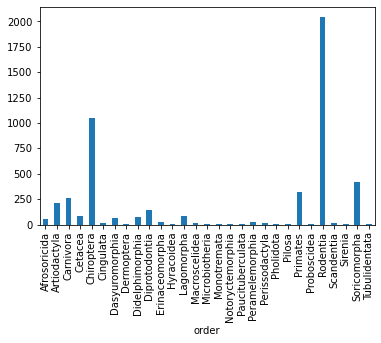

In [37]:
maturity_df_grouped_ord.size().plot.bar() 

- This is a bit hard to interpret. We might want to look at a plot like this in order of size.

## Sorting

\<insert obligatory_sorting_hat.gif\\>

- We can order things in ascending or descending order using `sort_values()`
- This is a fun programming task that you can implement yourself if you hate free time

<AxesSubplot:xlabel='order'>

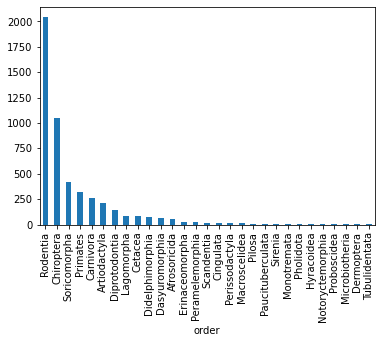

In [38]:
ord_sizes = maturity_df_grouped_ord.size()
ord_sizes_sorted = ord_sizes.sort_values(ascending=False) # <-- right here
ord_sizes_sorted.plot.bar()

## We can probably just do away with any order without enough members

In [39]:
sizeseries=maturity_df_grouped_ord.size()
sizeseries

order
Afrosoricida          50
Artiodactyla         212
Carnivora            262
Cetacea               82
Chiroptera          1048
Cingulata             20
Dasyuromorphia        63
Dermoptera             1
Didelphimorphia       71
Diprotodontia        140
Erinaceomorpha        24
Hyracoidea             4
Lagomorpha            85
Macroscelidea         14
Microbiotheria         1
Monotremata            4
Notoryctemorphia       2
Paucituberculata       6
Peramelemorphia       21
Perissodactyla        14
Pholidota              4
Pilosa                10
Primates             321
Proboscidea            2
Rodentia            2039
Scandentia            20
Sirenia                5
Soricomorpha         420
Tubulidentata          1
dtype: int64

## Let's get rid of any order that has fewer than 10 species

In [40]:
ord_mean_maturity = maturity_df_grouped_ord.mean()
big_enough = ord_mean_maturity[sizeseries>10]
print(big_enough)

                  maturity_d
order                       
Afrosoricida      269.641429
Artiodactyla      651.322368
Carnivora         884.049416
Cetacea          3036.481212
Chiroptera        371.109080
Cingulata         339.396667
Dasyuromorphia    340.916286
Didelphimorphia   237.910833
Diprotodontia     531.242069
Erinaceomorpha    248.257500
Lagomorpha        226.520769
Macroscelidea     117.626667
Peramelemorphia   152.738333
Perissodactyla   1554.743636
Primates         1496.432600
Rodentia          182.731696
Scandentia        122.770000
Soricomorpha      262.990690


In [41]:
# sort the values in big_enough

big_enough_sorted = big_enough.sort_values(by='maturity_d',ascending=False)

#CPF: explain 'by=' argument

<AxesSubplot:xlabel='order'>

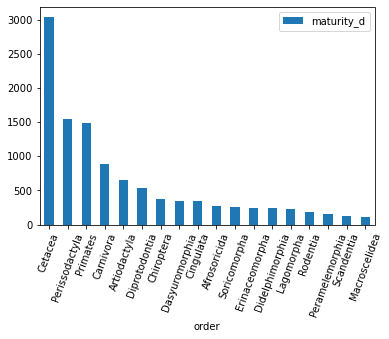

In [42]:
big_enough_sorted.plot.bar(rot=70)

## Question: Are some orders at greater risk of extinction?

- Let's see if our trusty crosstab can help us out

In [43]:
pantheria_iucn['iucn_status'].value_counts()

LC    2891
DD     621
VU     465
EN     402
NT     321
CR     165
EX      65
EP      14
EW       2
Name: iucn_status, dtype: int64

## Okay this is kinda hard to interpret:

- let's instead create a column to say whether a species is at risk or not as a bool

In [44]:
pd.crosstab(pantheria_iucn['order'],pantheria_iucn['iucn_status'],normalize=True)

iucn_status,CR,DD,EN,EP,EW,EX,LC,NT,VU
order,,,,,,,,,
Afrosoricida,0.000202,0.000607,0.001011,0.000000,0.000000,0.000000,0.006066,0.000607,0.001617
Artiodactyla,0.002224,0.002426,0.005661,0.000202,0.000404,0.000809,0.016983,0.005055,0.009098
Carnivora,0.000607,0.000607,0.005459,0.000000,0.000000,0.000607,0.032956,0.005257,0.007481
Cetacea,0.000404,0.008694,0.001415,0.000000,0.000000,0.000000,0.004448,0.000809,0.000809
Chiroptera,0.004246,0.031743,0.009098,0.000404,0.000000,0.000809,0.130813,0.014962,0.019814
Cingulata,0.000000,0.001011,0.000000,0.000000,0.000000,0.000000,0.001617,0.001011,0.000404
Dasyuromorphia,0.000202,0.000404,0.001011,0.000000,0.000000,0.000202,0.007885,0.002224,0.000809
Dermoptera,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000202,0.000000,0.000000
Didelphimorphia,0.000404,0.001820,0.000000,0.000000,0.000000,0.000000,0.011120,0.000404,0.000607


## Ordering our IUCN categories

- What type is our IUCN data currently stored as?
- The categories are actually ordinal
- We might define least concern (LC) to be the lowest level
  - Define any species above this level as being 'at risk'

![](images/iucn.png)

In [45]:
# first, let's create levels for our IUCN statuses
# range from 1 (least threatened) to 7 (most threatened) , with 0 == insufficient data

iucn_map={'LC':1,'NT':2,'VU':3,'EN':4,'CR':5,'EW':6,'EX':7,'DD':0}
pantheria_iucn['iucn_status'].replace(iucn_map)


0       EP
1        1
2        1
3        1
4        1
        ..
4941     4
4942     1
4943     3
4944     5
4945     1
Name: iucn_status, Length: 4946, dtype: object

In [46]:
pantheria_iucn['iucn_status'].replace(iucn_map).value_counts()

1     2891
0      621
3      465
4      402
2      321
5      165
7       65
EP      14
6        2
Name: iucn_status, dtype: int64

### what is 'EP'?? 

- This does not appear to be a real category in the list

<img style="float: right;" src="myimage.png">

![](images/iucn.png)

In [47]:
iucn_series = pantheria_iucn['iucn_status']

ep_series=iucn_series != "EP"
ep_series.value_counts()

True     4932
False      14
Name: iucn_status, dtype: int64

In [48]:
pantheria_iucn = pantheria_iucn[ep_series]
print(pantheria_iucn.shape,pantheria_iucn_orig.shape)

(4932, 8) (4946, 8)


### what is 'DD'?? 

- Let's do away with all DD lineages, since they are essentially missing data

<img style="float: right;" src="myimage.png">

![](images/iucn.png)

In [49]:
dd_series=iucn_series != "DD"
dd_series.value_counts()

True     4325
False     621
Name: iucn_status, dtype: int64

In [50]:
pantheria_iucn = pantheria_iucn[dd_series]
pantheria_iucn

/var/folders/0x/stfy9wr95_36z0f9gkmph_x40000gn/T/ipykernel_35345/3453928557.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pantheria_iucn = pantheria_iucn[dd_series]


,order,genus_species,body_mass_g,maturity_d,interbirth_d,longevity_m,litter_size_ind,iucn_status
1,Carnivora,Canis_adustus,10392.49,249.88,NaN,137.00,4.50,LC
2,Carnivora,Canis_aureus,9658.70,371.23,365.00,192.00,3.74,LC
3,Carnivora,Canis_latrans,11989.10,372.90,365.00,262.00,5.72,LC
4,Carnivora,Canis_lupus,31756.51,679.37,365.00,354.00,4.98,LC
5,Artiodactyla,Bos_javanicus,635974.34,797.31,NaN,318.96,1.22,EN
...,...,...,...,...,...,...,...,...
4941,Rodentia,Zygogeomys_trichopus,473.54,NaN,NaN,NaN,NaN,EN
4942,Rodentia,Zyzomys_argurus,40.42,155.06,219.00,NaN,2.76,LC
4943,Rodentia,Zyzomys_maini,93.99,NaN,NaN,NaN,NaN,VU
4944,Rodentia,Zyzomys_pedunculatus,100.00,NaN,NaN,NaN,NaN,CR


## LOGICAL MELTDOWN

- We just removed all columns != to 'EP' plus all columns != to 'DD' in two operations. 
- Exercise: how could we do this using one line of code?

In [51]:
# we want to remove all rows where iucn_status is either 'EP' or 'DD'

keep_rows = (pantheria_iucn_orig['iucn_status'] != 'EP') | (pantheria_iucn_orig['iucn_status'] != 'DD')
print("before: ",pantheria_iucn_orig.shape[0])
print("after: ",pantheria_iucn_orig[keep_rows].shape[0])

before:  4946
after:  4946


## Logic

not (A **or** B) = (not A) **and** (not B)


not (A **and** B) = (not A) **or** (not B)

In [52]:
# we want to remove all rows where iucn_status is either 'EP' or 'DD'

keep_rows = (pantheria_iucn_orig['iucn_status'] != 'EP') & (pantheria_iucn_orig['iucn_status'] != 'DD')
print("before: ",pantheria_iucn_orig.shape[0])
print("after: ",pantheria_iucn_orig[keep_rows].shape[0])

before:  4946
after:  4311


In [53]:
#iucn_map={1:'LC',2:'NT',3:'VU',4:'EN',5:'CR',6:'EW':,7:'EX',0:'DD':}
#iucn_map

In [54]:
# represent iucn status as int

iucn_status_int=pantheria_iucn['iucn_status'].replace(iucn_map)
iucn_status_int

1       1
2       1
3       1
4       1
5       4
       ..
4941    4
4942    1
4943    3
4944    5
4945    1
Name: iucn_status, Length: 4311, dtype: int64

In [55]:
iucn_status_int.value_counts

<bound method IndexOpsMixin.value_counts of 1       1
2       1
3       1
4       1
5       4
       ..
4941    4
4942    1
4943    3
4944    5
4945    1
Name: iucn_status, Length: 4311, dtype: int64>

## What categories should we consider 'at risk'?

![](images/iucn_list.png)

In [56]:
iucn_map

{'LC': 1, 'NT': 2, 'VU': 3, 'EN': 4, 'CR': 5, 'EW': 6, 'EX': 7, 'DD': 0}

In [57]:
atrisk = iucn_status_int > 2
atrisk.value_counts()

False    3212
True     1099
Name: iucn_status, dtype: int64

In [58]:
pantheria_iucn['at_risk'] = atrisk
pantheria_iucn

,order,genus_species,body_mass_g,maturity_d,interbirth_d,longevity_m,litter_size_ind,iucn_status,at_risk
1,Carnivora,Canis_adustus,10392.49,249.88,NaN,137.00,4.50,LC,False
2,Carnivora,Canis_aureus,9658.70,371.23,365.00,192.00,3.74,LC,False
3,Carnivora,Canis_latrans,11989.10,372.90,365.00,262.00,5.72,LC,False
4,Carnivora,Canis_lupus,31756.51,679.37,365.00,354.00,4.98,LC,False
5,Artiodactyla,Bos_javanicus,635974.34,797.31,NaN,318.96,1.22,EN,True
...,...,...,...,...,...,...,...,...,...
4941,Rodentia,Zygogeomys_trichopus,473.54,NaN,NaN,NaN,NaN,EN,True
4942,Rodentia,Zyzomys_argurus,40.42,155.06,219.00,NaN,2.76,LC,False
4943,Rodentia,Zyzomys_maini,93.99,NaN,NaN,NaN,NaN,VU,True
4944,Rodentia,Zyzomys_pedunculatus,100.00,NaN,NaN,NaN,NaN,CR,True


In [59]:
iucn_ord_cross = pd.crosstab(pantheria_iucn['order'],pantheria_iucn['at_risk'])
iucn_ord_cross

at_risk,False,True
order,,
Afrosoricida,33,14
Artiodactyla,109,90
Carnivora,189,70
Cetacea,26,13
Chiroptera,721,168
Cingulata,13,2
Dasyuromorphia,50,11
Dermoptera,1,0
Didelphimorphia,57,5


### Let's remove orders with <10 species again

In [60]:
sizeseries=iucn_ord_cross.sum(axis=1)
sizeseries

order
Afrosoricida          47
Artiodactyla         199
Carnivora            259
Cetacea               39
Chiroptera           889
Cingulata             15
Dasyuromorphia        61
Dermoptera             1
Didelphimorphia       62
Diprotodontia        140
Erinaceomorpha        23
Hyracoidea             4
Lagomorpha            82
Macroscelidea         12
Microbiotheria         1
Monotremata            4
Notoryctemorphia       2
Paucituberculata       6
Peramelemorphia       19
Perissodactyla        14
Pholidota              4
Pilosa                10
Primates             314
Proboscidea            2
Rodentia            1733
Scandentia            17
Sirenia                5
Soricomorpha         346
Tubulidentata          1
dtype: int64

In [61]:
iucn_ord_cross = iucn_ord_cross[sizeseries>10]
iucn_ord_cross

at_risk,False,True
order,,
Afrosoricida,33,14
Artiodactyla,109,90
Carnivora,189,70
Cetacea,26,13
Chiroptera,721,168
Cingulata,13,2
Dasyuromorphia,50,11
Didelphimorphia,57,5
Diprotodontia,86,54


## Let's convert these raw counts to proportions

- we can use the `.div()` and `.sum()` functions to do this.

In [62]:
iucn_ord_freq = iucn_ord_cross.div(iucn_ord_cross.sum(axis=1),axis=0)
iucn_ord_freq

at_risk,False,True
order,,
Afrosoricida,0.702128,0.297872
Artiodactyla,0.547739,0.452261
Carnivora,0.729730,0.270270
Cetacea,0.666667,0.333333
Chiroptera,0.811024,0.188976
Cingulata,0.866667,0.133333
Dasyuromorphia,0.819672,0.180328
Didelphimorphia,0.919355,0.080645
Diprotodontia,0.614286,0.385714


<AxesSubplot:xlabel='order'>

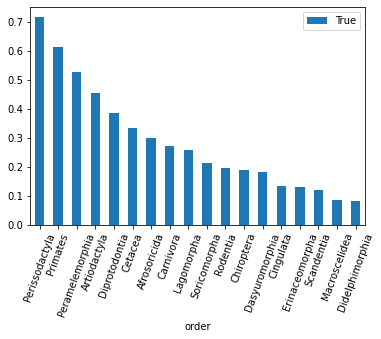

In [63]:
iucn_ord_freq.sort_values(by=True,ascending=False).plot.bar(y=True,rot=70)

## Are mammals that take longer to develop at higher risk of extinction?

- We can survey across all IUCN categories

In [64]:
maturity_df = pantheria_iucn[['iucn_status','maturity_d']]

maturity_df_grouped = maturity_df.groupby('iucn_status') #group the dataframe by iucn_status

print(maturity_df_grouped)

In [65]:
maturity_df_grouped.mean()  # calc the mean maturation time for each iucn_status

,maturity_d
iucn_status,
CR,1214.404063
EN,1256.740750
EW,NaN
EX,NaN
LC,477.072049
NT,702.058485
VU,898.499674


<AxesSubplot:xlabel='iucn_status'>

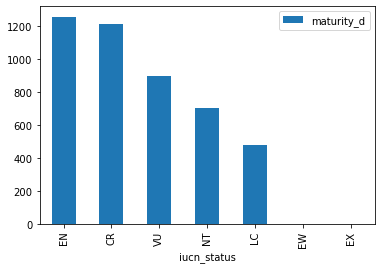

In [66]:
# what is the average maturation time within each category?
maturity_df_grouped.mean().sort_values(by='maturity_d',ascending=False).plot.bar()  


## Are mammals that take longer to develop at higher risk of extinction?

- Let's try it now comparing just at risk vs not at risk

In [67]:
#maturity_df = pantheria_iucn[['iucn_status','maturity_d']]

#maturity_df_grouped = maturity_df.groupby('iucn_status') #group the dataframe by iucn_status

risk_group = pantheria_iucn.groupby("at_risk")

risk_group.mean()

,body_mass_g,maturity_d,interbirth_d,longevity_m,litter_size_ind
at_risk,,,,,
False,82415.247417,496.765822,271.954641,166.703257,2.696585
True,439567.213944,1088.540000,521.061899,259.413100,1.747238


## Species that are at risk take twice as long to grow up on average!

<AxesSubplot:xlabel='at_risk'>

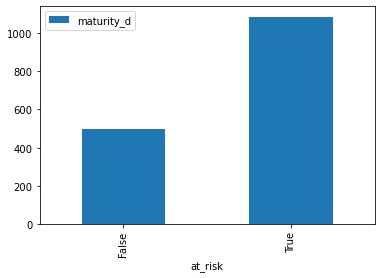

In [68]:
risk_group.mean().plot.bar(y='maturity_d')

# Statistical Variables


- A **categorical variable** is a variable for which the measurement scale consists of a set of categories.  For example, order has 29 categories or **levels**.  These types of variables are very common in social and biomedical sciences, and many other areas. 

- A categorical variables that don't have a natural ordering is called a **nominal variable**.

- If a categorical variable has a natural ordering it is called an **ordinal variable**.  For example, iucn levels of risk are from extinct to least concern.

- **Ordinal variables** clearly order categories, but the "distance" between categories are unknown. A species categorized as critically endangered versus endangered is at higher risk of danger, although we cannot give a numerical value for how much more endangered the species is.

- A **continuous variable** is one that does have numerical distances between any two levels of the measurement scale.  For example, age measured in years is an continuous variable.

- Weight is an example of an **continuous (statistical) variable**.

# What's the difference between a Statistical Variable and a Variable in python?

- A variable in python is a location in computer memory to store a value.

- A statistical variable is essentially a mathematical representation of data.

## Examples of implementing statistical variables in python

If 10 people are *randomly* selected, and asked how many minutes they slept last night, then this data could be represented by an **continuous variable**.
   + In python the data could be represented in `pandas` `series`, where the `series` data type is float.

If 10 people are *randomly* selected, and asked if they believe that climate change is a pressing problem, then this data could be represented by an **categorical variable**.
   + In python the data could be represented in `pandas` `series`, where the `series` data type is Boolean (`True` if yes, and `False` if no).




# Statistical Distributions

- What is a statistical distribution?

- How can a distribution be summarized?

- What questions can we answer using a distribution? 

# What is the distribution of activity cycle among species?

In [73]:
activity_dist = pantheria['1-1_ActivityCycle'].value_counts()
activity_dist

1.0    733
2.0    487
3.0    439
Name: 1-1_ActivityCycle, dtype: int64

1. nocturnal only, 

2. nocturnal/crepuscular, cathemeral, crepuscular or diurnal/crepuscular and 

3. diurnal only.

- It can be visualized in a bar plot.

- The bars represent the frequency of observations (rows) and the labels on the horizontal axis represent the number of species in an activity cycle. 

- This is called the **frequency distribution** of activity.

<AxesSubplot:>

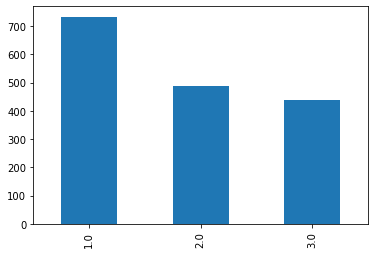

In [69]:
activity_dist.plot.bar()

- If we want to plot proportions instead of counts then we can transform `activity_dist` by dividing by the total number of observations.

- This is called the **relative frequency distribution** of activity.

In [70]:
activity_dist_prop = activity_dist/activity_dist.sum()
activity_dist_prop

1.0    0.441832
2.0    0.293550
3.0    0.264617
Name: 1-1_ActivityCycle, dtype: float64

<AxesSubplot:>

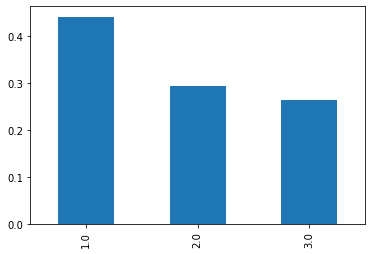

In [71]:
activity_dist_prop.plot.bar()

# Summarizing the distribution of an continuous variable

## What is the distribution of time between births across species?

In [72]:
rn_pantheria['interbirth_d'].describe()

count     695.000000
mean      337.934432
std       300.271701
min        17.000000
25%       121.830000
50%       365.000000
75%       365.000000
max      2007.500000
Name: interbirth_d, dtype: float64

- `count` : the total number of observations.

- `mean`: the arithmetic average of `'interbirth_d'`.

- `std` : the standard deviation of `'interbirth_d'`.

- `min`, `max` : the smallest and largest values of `'interbirth_d'`.

- `25%`, `50%`, `75%` : the 25th, 50th, 75th quantiles of `'interbirth_d'` - 25% / 50% / 75% of the values of `'interbirth_d'` are below these values respectively.



`pandas` has separate function to compute all of these statistics.  

`quantile` function can compute quantiles of an continuous variable. 

In [74]:
print('25%:', rn_pantheria['interbirth_d'].quantile(q = 0.25))
print('50%:', rn_pantheria['interbirth_d'].quantile(q = 0.50))
print('75%:', rn_pantheria['interbirth_d'].quantile(q = 0.75))

25%: 121.83
50%: 365.0
75%: 365.0


## Quantiles

- The median value is the 50% quantile.  50% of the values fall below this value.  The median is also called the second quartile.

- The 25% quantile is the value where 25% of the values fall below.  This is often the first quartile.  

- The 75% quantile is the value where 75% of the values fall below.  This is often the third quartile.  

- There are 695 values.  If we sort the values from largest to smallest then find the value in the middle (695 / 2 ) then that value is the median.

`std`, `min`, `max`, `count` can compute all 

In [74]:
print('standard deviation (std):', rn_pantheria['interbirth_d'].std())
print('min:', rn_pantheria['interbirth_d'].min())
print('max:', rn_pantheria['interbirth_d'].max())
print('count:', rn_pantheria['interbirth_d'].count())

standard deviation (std): 300.2717005788529
min: 17.0
max: 2007.5
count: 695


## Variation

- One of the most important concepts in statistical reasoning.

- Standard deviation is average deviation from the mean.  **Large** values mean large variation and **small** values mean small variation.   

- Other measures of variation are the range (max - min) and interquartile range (75th quantile - 25th quantile).

- Small samples often have large variation, so estimating a statistic from a small sample is usually less reliable.

## Question

A certain town is served by two hospitals. In the larger hospital about 45 babies are born each day, and in the smaller hospital about 15 babies are born each day. As you know, about 50% of all babies are boys. However, the exact percentage varies from day to day. Sometimes it may be higher than 50%, sometimes lower.


For a period of 1 year, each hospital recorded the days on which more than 60% of the babies born were boys. Which hospital do you think recorded more such days?

- The larger hospital
- The smaller hospital
- About the same (that is, within 5% of each other) 

## Histograms

<AxesSubplot:ylabel='Frequency'>

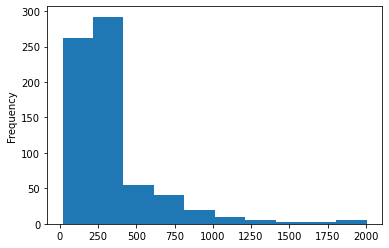

In [75]:
rn_pantheria['interbirth_d'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

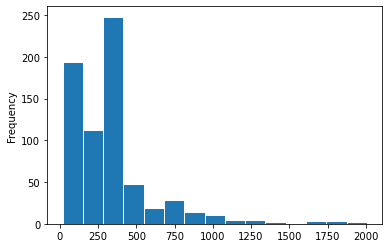

In [86]:
rn_pantheria['interbirth_d'].plot.hist(edgecolor = 'white', bins = 15)

In [78]:
pd.cut(rn_pantheria['interbirth_d'], bins = 10)

0       (614.15, 813.2]
1                   NaN
2       (216.05, 415.1]
3       (216.05, 415.1]
4       (216.05, 415.1]
             ...       
5411    (216.05, 415.1]
5412                NaN
5413                NaN
5414                NaN
5415    (216.05, 415.1]
Name: interbirth_d, Length: 5416, dtype: category
Categories (10, interval[float64, right]): [(15.01, 216.05] < (216.05, 415.1] < (415.1, 614.15] < (614.15, 813.2] ... (1211.3, 1410.35] < (1410.35, 1609.4] < (1609.4, 1808.45] < (1808.45, 2007.5]]

In [78]:
pd.cut(rn_pantheria['interbirth_d'], bins = 10).value_counts()

(216.05, 415.1]      292
(15.01, 216.05]      262
(415.1, 614.15]       55
(614.15, 813.2]       41
(813.2, 1012.25]      20
(1012.25, 1211.3]      9
(1211.3, 1410.35]      5
(1808.45, 2007.5]      5
(1410.35, 1609.4]      3
(1609.4, 1808.45]      3
Name: interbirth_d, dtype: int64

In [79]:
pd.cut(rn_pantheria['interbirth_d'], bins = 10).value_counts().sort_index()

(15.01, 216.05]      262
(216.05, 415.1]      292
(415.1, 614.15]       55
(614.15, 813.2]       41
(813.2, 1012.25]      20
(1012.25, 1211.3]      9
(1211.3, 1410.35]      5
(1410.35, 1609.4]      3
(1609.4, 1808.45]      3
(1808.45, 2007.5]      5
Name: interbirth_d, dtype: int64

In [80]:
rn_pantheria['interbirth_d'].describe()

count     695.000000
mean      337.934432
std       300.271701
min        17.000000
25%       121.830000
50%       365.000000
75%       365.000000
max      2007.500000
Name: interbirth_d, dtype: float64

## Question: How could we find the value XX in these statements?

- 10% of species have an inter-birth value less than XX days.

- The range of inter-birth among species is XX days.

In [88]:
rn_pantheria['interbirth_d'].quantile(q = .1)

rn_pantheria['interbirth_d'].max() - rn_pantheria['interbirth_d'].min()

1990.5

## Boxplots 

Another way to visualize the distribution of an continuous variable

A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of box to show the range of the data. By default, they extend no more than 1.5 * IQR (IQR = Q3 - Q1) from the edges of the box, ending at the farthest data point within that interval. Outliers are plotted as separate dots.

Boxplots are helpful for comparing the distributions between groups.

```
     Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR
                  |-----:-----|
  o      |--------|     :     |--------|    o  o
                  |-----:-----|
flier             <----------->            fliers
                       IQR
```

<AxesSubplot:>

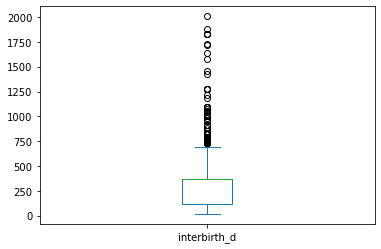

In [81]:
rn_pantheria['interbirth_d'].plot.box()

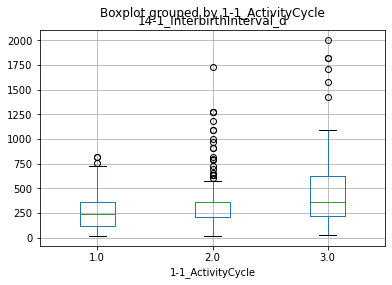

In [95]:
pantheria.boxplot(column= '14-1_InterbirthInterval_d', by = '1-1_ActivityCycle');

In [94]:
activity_birth = pantheria[['14-1_InterbirthInterval_d', '1-1_ActivityCycle']]

activity_birth.groupby('1-1_ActivityCycle').describe()

14-1_InterbirthInterval_d                                \
                                      count        mean         std   min   
1-1_ActivityCycle                                                           
1.0                                   177.0  249.233390  171.756673  17.0   
2.0                                   200.0  357.209750  256.442844  17.0   
3.0                                   139.0  477.706619  375.856530  26.5   

                                                     
                       25%     50%     75%      max  
1-1_ActivityCycle                                    
1.0                116.750  243.33  365.00   821.25  
2.0                210.875  365.00  365.00  1733.75  
3.0                219.300  365.00  626.58  2007.50